<a href="https://colab.research.google.com/github/singlahimani786/Clustering_Ass_102217156/blob/main/Clustering_102217156.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)


In [ ]:
def evaluate_clustering(X, labels):
    return {
        'Silhouette': round(silhouette_score(X, labels), 3),
        'Calinski-Harabasz': round(calinski_harabasz_score(X, labels), 1),
        'Davies-Bouldin': round(davies_bouldin_score(X, labels), 2)
    }

def run_clustering(X, method, cluster_range=[3, 4, 5]):
    results = {}
    for c in cluster_range:
        if method == 'kmeans':
            model = KMeans(n_clusters=c, random_state=42, n_init='auto')
        elif method == 'hierarchical':
            model = AgglomerativeClustering(n_clusters=c)
        else:
            continue  # MeanShift handles its own bandwidth
        labels = model.fit_predict(X)
        results[f'c={c}'] = evaluate_clustering(X, labels)
    return results

def run_meanshift(X):
    model = MeanShift()
    labels = model.fit_predict(X)
    return {'c=N/A': evaluate_clustering(X, labels)}


In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

preprocessing_variants = {
    'No Processing': X,
    'Normalized': X_norm,
    'PCA': X_pca,
    'Norm+PCA': PCA(n_components=2).fit_transform(X_norm),

}


In [ ]:
methods = ['kmeans', 'hierarchical']
final_results = {}

for prep, data in preprocessing_variants.items():
    for method in methods:
        results = run_clustering(data, method)
        final_results[f'{method.upper()} - {prep}'] = results

    if prep != 'PCA':  # MeanShift not suitable post-PCA
        final_results[f'MEANSHIFT - {prep}'] = run_meanshift(data)


In [ ]:
def make_final_style_table(algo_name):
    df = result_df[result_df['Algo'].str.upper() == algo_name.upper()].copy()
    df['Column'] = df['Preprocessing'] + '\nc=' + df['Clusters'].astype(str)

    # Pivot for each metric
    sil = df.pivot_table(index=None, columns='Column', values='Silhouette')
    ch = df.pivot_table(index=None, columns='Column', values='Calinski-Harabasz')
    db = df.pivot_table(index=None, columns='Column', values='Davies-Bouldin')

    # Concatenate as rows
    final_table = pd.concat([sil, ch, db], axis=0)
    final_table.index = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

    return final_table.round(2)



In [ ]:
# For K-Means
kmeans_table = make_final_style_table('KMEANS')
print("Using K-Means Clustering")
display(kmeans_table)

# For Hierarchical
hierarchical_table = make_final_style_table('HIERARCHICAL')
print("\nUsing Hierarchical Clustering")
display(hierarchical_table)

# For Mean Shift
meanshift_table = make_final_style_table('MEANSHIFT')
print("\nUsing K-Means Shift Clustering")
display(meanshift_table)


Using K-Means Clustering


Column,No Processing\nc=3.0,No Processing\nc=4.0,No Processing\nc=5.0,Norm+PCA\nc=3.0,Norm+PCA\nc=4.0,Norm+PCA\nc=5.0,Normalized\nc=3.0,Normalized\nc=4.0,Normalized\nc=5.0,PCA\nc=3.0,PCA\nc=4.0,PCA\nc=5.0
Silhouette,0.55,0.50,0.49,0.52,0.44,0.41,0.48,0.38,0.34,0.52,0.44,0.41
Calinski-Harabasz,561.60,529.50,495.20,181.00,263.90,278.50,157.40,206.70,202.60,181.00,263.90,278.50
Davies-Bouldin,0.67,0.75,0.82,0.74,0.74,0.78,0.79,0.87,0.94,0.74,0.74,0.78



Using Hierarchical Clustering


Column,No Processing\nc=3.0,No Processing\nc=4.0,No Processing\nc=5.0,Norm+PCA\nc=3.0,Norm+PCA\nc=4.0,Norm+PCA\nc=5.0,Normalized\nc=3.0,Normalized\nc=4.0,Normalized\nc=5.0,PCA\nc=3.0,PCA\nc=4.0,PCA\nc=5.0
Silhouette,0.55,0.49,0.48,0.51,0.45,0.40,0.45,0.40,0.33,0.51,0.45,0.40
Calinski-Harabasz,558.10,515.10,488.50,286.30,254.10,255.00,222.70,201.30,192.70,286.30,254.10,255.00
Davies-Bouldin,0.66,0.80,0.82,0.71,0.72,0.79,0.80,0.98,0.97,0.71,0.72,0.79



Using K-Means Shift Clustering


Column,No Processing\nc=nan,Norm+PCA\nc=nan,Normalized\nc=nan
Silhouette,0.69,0.62,0.58
Calinski-Harabasz,509.70,283.00,251.30
Davies-Bouldin,0.39,0.54,0.59


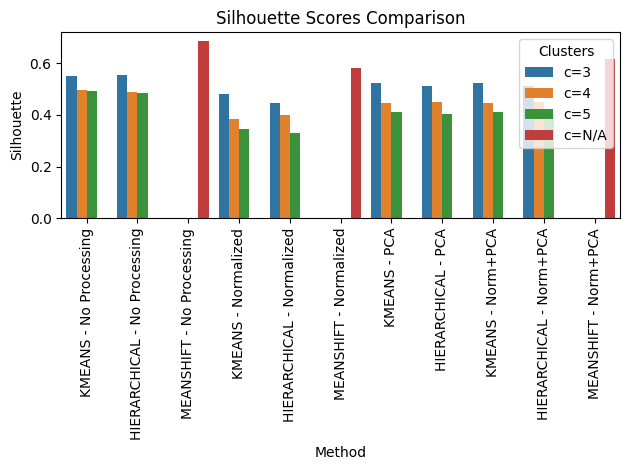

In [ ]:
sns.barplot(data=result_df, x='Method', y='Silhouette', hue='Clusters')
plt.xticks(rotation=90)
plt.title('Silhouette Scores Comparison')
plt.tight_layout()
plt.show()
